In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
original_df = pd.read_csv('train.csv')
original_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
print(f"Shape of dataframe: {original_df.shape}")

Shape of dataframe: (1460, 81)


In [4]:
print(original_df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [5]:
aircon_dataframe = original_df.loc[:,['CentralAir', 'SalePrice', 'OverallQual', 'YearBuilt']].copy()
aircon_dataframe

,CentralAir,SalePrice,OverallQual,YearBuilt
0,Y,208500,7,2003
1,Y,181500,6,1976
2,Y,223500,7,2001
3,Y,140000,7,1915
4,Y,250000,8,2000
...,...,...,...,...
1455,Y,175000,6,1999
1456,Y,210000,6,1978
1457,Y,266500,7,1941
1458,Y,142125,5,1950


Problem 1: Predicting CentralAir using SalePrice In this problem, you will build a Classification Tree model to predict CentralAir using SalePrice and judge its accuracy. 

a) Create appropriate datasets for Train and Test in an 75:25 ratio and fit two Classification Tree models (of max depth 3 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.  

b) Print the confusion matrix on Train set and Test set for both the aforesaid models. Compute and print for both the trees the Classification Accuracy, True Positive Rate, False Positive Rate. Which of the two models is better? 

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

class Model:

    def __init__(self, feature, variable, max_depth):
        self.max_depth = max_depth
        self.dectree = DecisionTreeClassifier(max_depth=self.max_depth)
        self.feature = feature
        self.variable = variable
        self.df_train = aircon_dataframe.loc[:, [feature, variable]].copy()
        self.df_train[variable] = self.df_train[variable].map({'Y': 1, 'N': 0})

    def fit_and_predict_y_val(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.df_train[self.feature].to_frame(), self.df_train[self.variable].to_frame(), test_size=0.25)
    
        self.dectree.fit(self.X_train, self.y_train)
        self.y_train_pred = self.dectree.predict(self.X_train)
        self.y_test_pred = self.dectree.predict(self.X_test)
    
    # CLASSIFICATION ACCURACY ABD TPR/FPR

    def print_results(self):
        
        # goodness of fit on train data
        self.train_cm = confusion_matrix(self.y_train, self.y_train_pred)
        self.train_score = self.dectree.score(self.X_train, self.y_train)
        self.train_tpr = self.train_cm[1][1]/(np.sum(self.train_cm[1]))
        self.train_fpr = self.train_cm[1][0]/(np.sum(self.train_cm[0]))
        print(f"Goodness of Fit of Model \tTrain Dataset: {self.feature}, Max depth: {self.max_depth}")
        print("Classification Accuracy \t:", self.train_score)
        print("True Positive Rate (TP/TP+FN) \t:", self.train_tpr)
        print("False Positive Rate (FP/TN+FP) \t:", self.train_fpr)
        print()

        # goodness of fit on test data
        self.test_cm = confusion_matrix(self.y_test, self.y_test_pred)
        self.test_score = self.dectree.score(self.X_test, self.y_test)
        self.test_tpr = self.test_cm[1][1]/(np.sum(self.test_cm[1]))
        self.test_fpr = self.test_cm[1][0]/(np.sum(self.test_cm[0]))
        print(f"Goodness of Fit of Model \tTest Dataset: {self.feature}, Max depth: {self.max_depth}")
        print("Classification Accuracy \t:", self.test_score)
        print("True Positive Rate (TP/TP+FN) \t:", self.test_tpr)
        print("False Positive Rate (FP/TN+FP) \t:", self.test_fpr)
        print()
    
    def print_cm(self):
        fig, axes = plt.subplots(1, 2, figsize=(14, 7))

        sns.heatmap(self.train_cm,
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
        axes[0].set_title(f'Training Confusion Matrix: {self.feature}, Max depth: {self.max_depth}')
        sns.heatmap(self.test_cm, 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
        axes[1].set_title(f'Test Confusion Matrix: {self.feature}, Max depth: {self.max_depth}')

    def print_dectree(self):
        f = plt.figure(figsize=(20,20))
        plot_tree(self.dectree, filled=True, rounded=True, 
                    feature_names=[self.feature], 
                    class_names=["No AC","With AC"])
        plt.title(f"Decision tree (Max Depth {self.max_depth}): {self.variable} classified by {self.feature}")
        plt.show()

Goodness of Fit of Model 	Train Dataset: SalePrice, Max depth: 3
Classification Accuracy 	: 0.947945205479452
True Positive Rate (TP/TP+FN) 	: 0.9980582524271845
False Positive Rate (FP/TN+FP) 	: 0.03076923076923077

Goodness of Fit of Model 	Test Dataset: SalePrice, Max depth: 3
Classification Accuracy 	: 0.9260273972602739
True Positive Rate (TP/TP+FN) 	: 0.9970149253731343
False Positive Rate (FP/TN+FP) 	: 0.03333333333333333



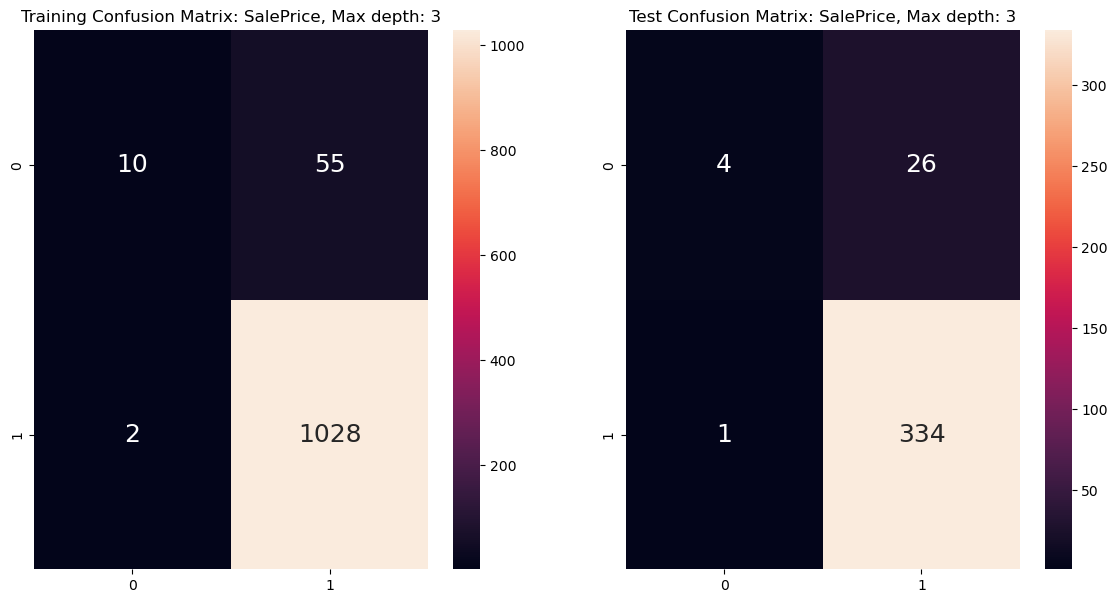

In [7]:
salePrice_3_model = Model("SalePrice", "CentralAir", 3)
salePrice_3_model.fit_and_predict_y_val()
salePrice_3_model.print_results()
salePrice_3_model.print_cm()

Goodness of Fit of Model 	Train Dataset: SalePrice, Max depth: 4
Classification Accuracy 	: 0.9461187214611873
True Positive Rate (TP/TP+FN) 	: 0.9970674486803519
False Positive Rate (FP/TN+FP) 	: 0.041666666666666664

Goodness of Fit of Model 	Test Dataset: SalePrice, Max depth: 4
Classification Accuracy 	: 0.9315068493150684
True Positive Rate (TP/TP+FN) 	: 0.9853801169590644
False Positive Rate (FP/TN+FP) 	: 0.21739130434782608



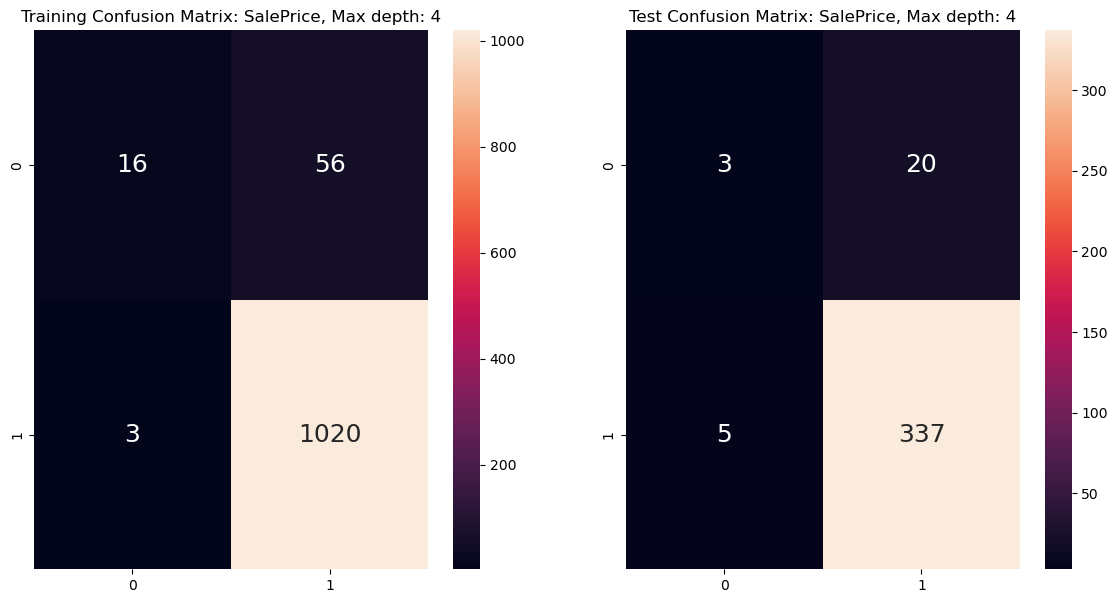

In [8]:
salePrice_4_model = Model("SalePrice", "CentralAir", 4)
salePrice_4_model.fit_and_predict_y_val()
salePrice_4_model.print_results()
salePrice_4_model.print_cm()

In [9]:
def print_highest_scores(models, good_metrics, poor_metrics):
    print("After considering the models after 1 iteration, these are the results:")
    top_model_count = [0] * len(models)
    for metric in good_metrics:
        top_model = 0
        for i, model in enumerate(models):
            if getattr(model, metric) > getattr(models[top_model], metric):
                top_model = i
        print(f"Highest {metric}: {models[top_model].feature} ({models[top_model].max_depth})")
        top_model_count[top_model] += 1

    for metric in poor_metrics:
        top_model = 0
        for i, model in enumerate(models):
            if getattr(model, metric) < getattr(models[top_model], metric):
                top_model = i
        print(f"Lowest {metric}: {models[top_model].feature} ({models[top_model].max_depth})")
        top_model_count[top_model] += 1

    top_index = np.argmax(top_model_count)
    print(f"It seems that has the best combination of highest Test Classification Accuracy, Highest TPR, and lowest FPR is the model for {models[top_index].feature} ({models[top_index].max_depth})")

In [10]:
models = [salePrice_3_model, salePrice_4_model]
good_metrics = ["train_score", "train_tpr", "test_score", "test_tpr"]
poor_metrics = ["train_fpr", "test_fpr"]
print_highest_scores(models, good_metrics, poor_metrics)

After considering the models after 1 iteration, these are the results:
Highest train_score: SalePrice (3)
Highest train_tpr: SalePrice (3)
Highest test_score: SalePrice (4)
Highest test_tpr: SalePrice (3)
Lowest train_fpr: SalePrice (3)
Lowest test_fpr: SalePrice (3)
It seems that has the best combination of highest Test Classification Accuracy, Highest TPR, and lowest FPR is the model for SalePrice (3)


Problem 2: Predicting CentralAir using Other Variables Following the steps from the previous problem, build two new uni-variate Classification Tree models (of max depth 3) to predict CentralAir using the variables OverallQual and YearBuilt. Justify which of the variables is the best predictor.

Goodness of Fit of Model 	Train Dataset: OverallQual, Max depth: 3
Classification Accuracy 	: 0.9351598173515981
True Positive Rate (TP/TP+FN) 	: 0.9941002949852508
False Positive Rate (FP/TN+FP) 	: 0.07692307692307693

Goodness of Fit of Model 	Test Dataset: OverallQual, Max depth: 3
Classification Accuracy 	: 0.9534246575342465
True Positive Rate (TP/TP+FN) 	: 0.9913793103448276
False Positive Rate (FP/TN+FP) 	: 0.17647058823529413



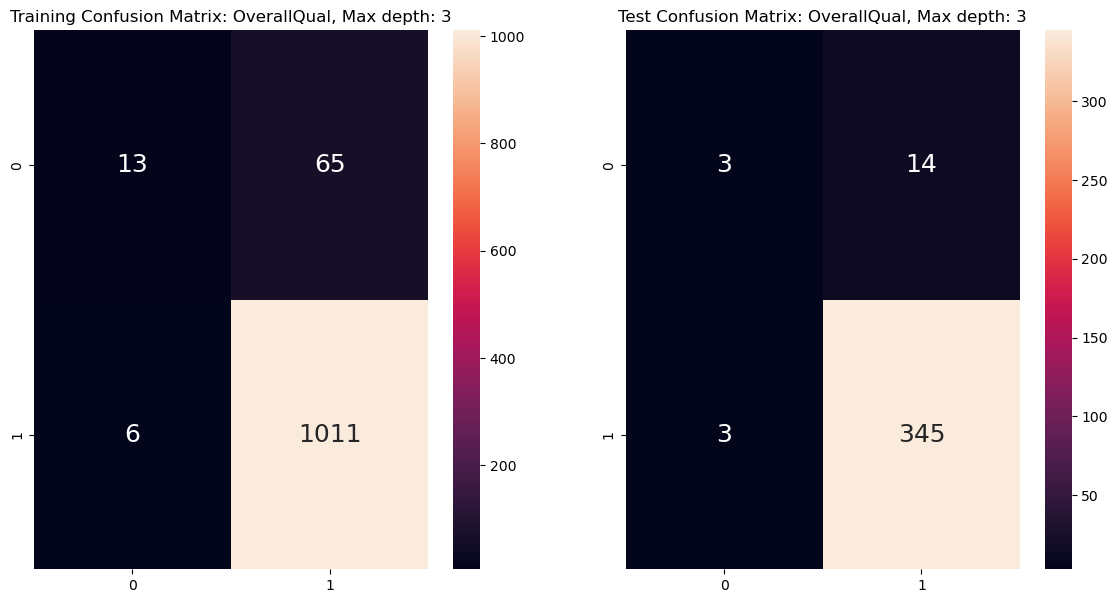

In [11]:
overallQual_3_model = Model("OverallQual", "CentralAir", 3)

overallQual_3_model.fit_and_predict_y_val()
overallQual_3_model.print_results()
overallQual_3_model.print_cm()

Goodness of Fit of Model 	Train Dataset: YearBuilt, Max depth: 3
Classification Accuracy 	: 0.9360730593607306
True Positive Rate (TP/TP+FN) 	: 1.0
False Positive Rate (FP/TN+FP) 	: 0.0

Goodness of Fit of Model 	Test Dataset: YearBuilt, Max depth: 3
Classification Accuracy 	: 0.936986301369863
True Positive Rate (TP/TP+FN) 	: 1.0
False Positive Rate (FP/TN+FP) 	: 0.0



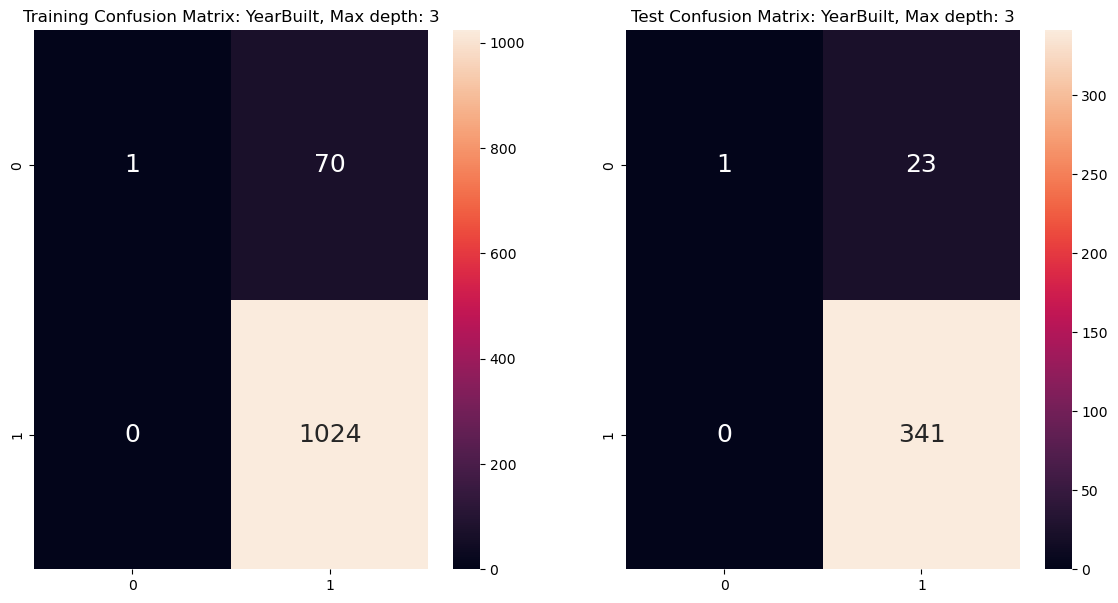

In [12]:
YearBuilt_3_model = Model("YearBuilt", "CentralAir", 3)

YearBuilt_3_model.fit_and_predict_y_val()
YearBuilt_3_model.print_results()
YearBuilt_3_model.print_cm()

In [13]:
models = [salePrice_3_model, salePrice_4_model, overallQual_3_model, YearBuilt_3_model]

good_metrics = ["train_score", "train_tpr", "test_score", "test_tpr"]
poor_metrics = ["train_fpr", "test_fpr"]

print_highest_scores(models, good_metrics, poor_metrics)

After considering the models after 1 iteration, these are the results:
Highest train_score: SalePrice (3)
Highest train_tpr: YearBuilt (3)
Highest test_score: OverallQual (3)
Highest test_tpr: YearBuilt (3)
Lowest train_fpr: YearBuilt (3)
Lowest test_fpr: YearBuilt (3)
It seems that has the best combination of highest Test Classification Accuracy, Highest TPR, and lowest FPR is the model for YearBuilt (3)


Problem 3 : Understanding the Misclassified Samples In this problem, you will consider finer details of the tree model and try to isolate the misclassified samples for a model. 

(a) Print the Classification Tree of max depth 3 that you fit in Problem 1(a). Note that each leaf node of your tree represents a specific partition of your training data, based on certain conditions given by the splits in the tree. Find out which leaf node of this tree has the highest number of False Positives (FP) in the training dataset and print all samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit.  

(b) Print ONLY the False Positive cases (rows from the dataframe) from the samples (rows) extracted in part (a).  

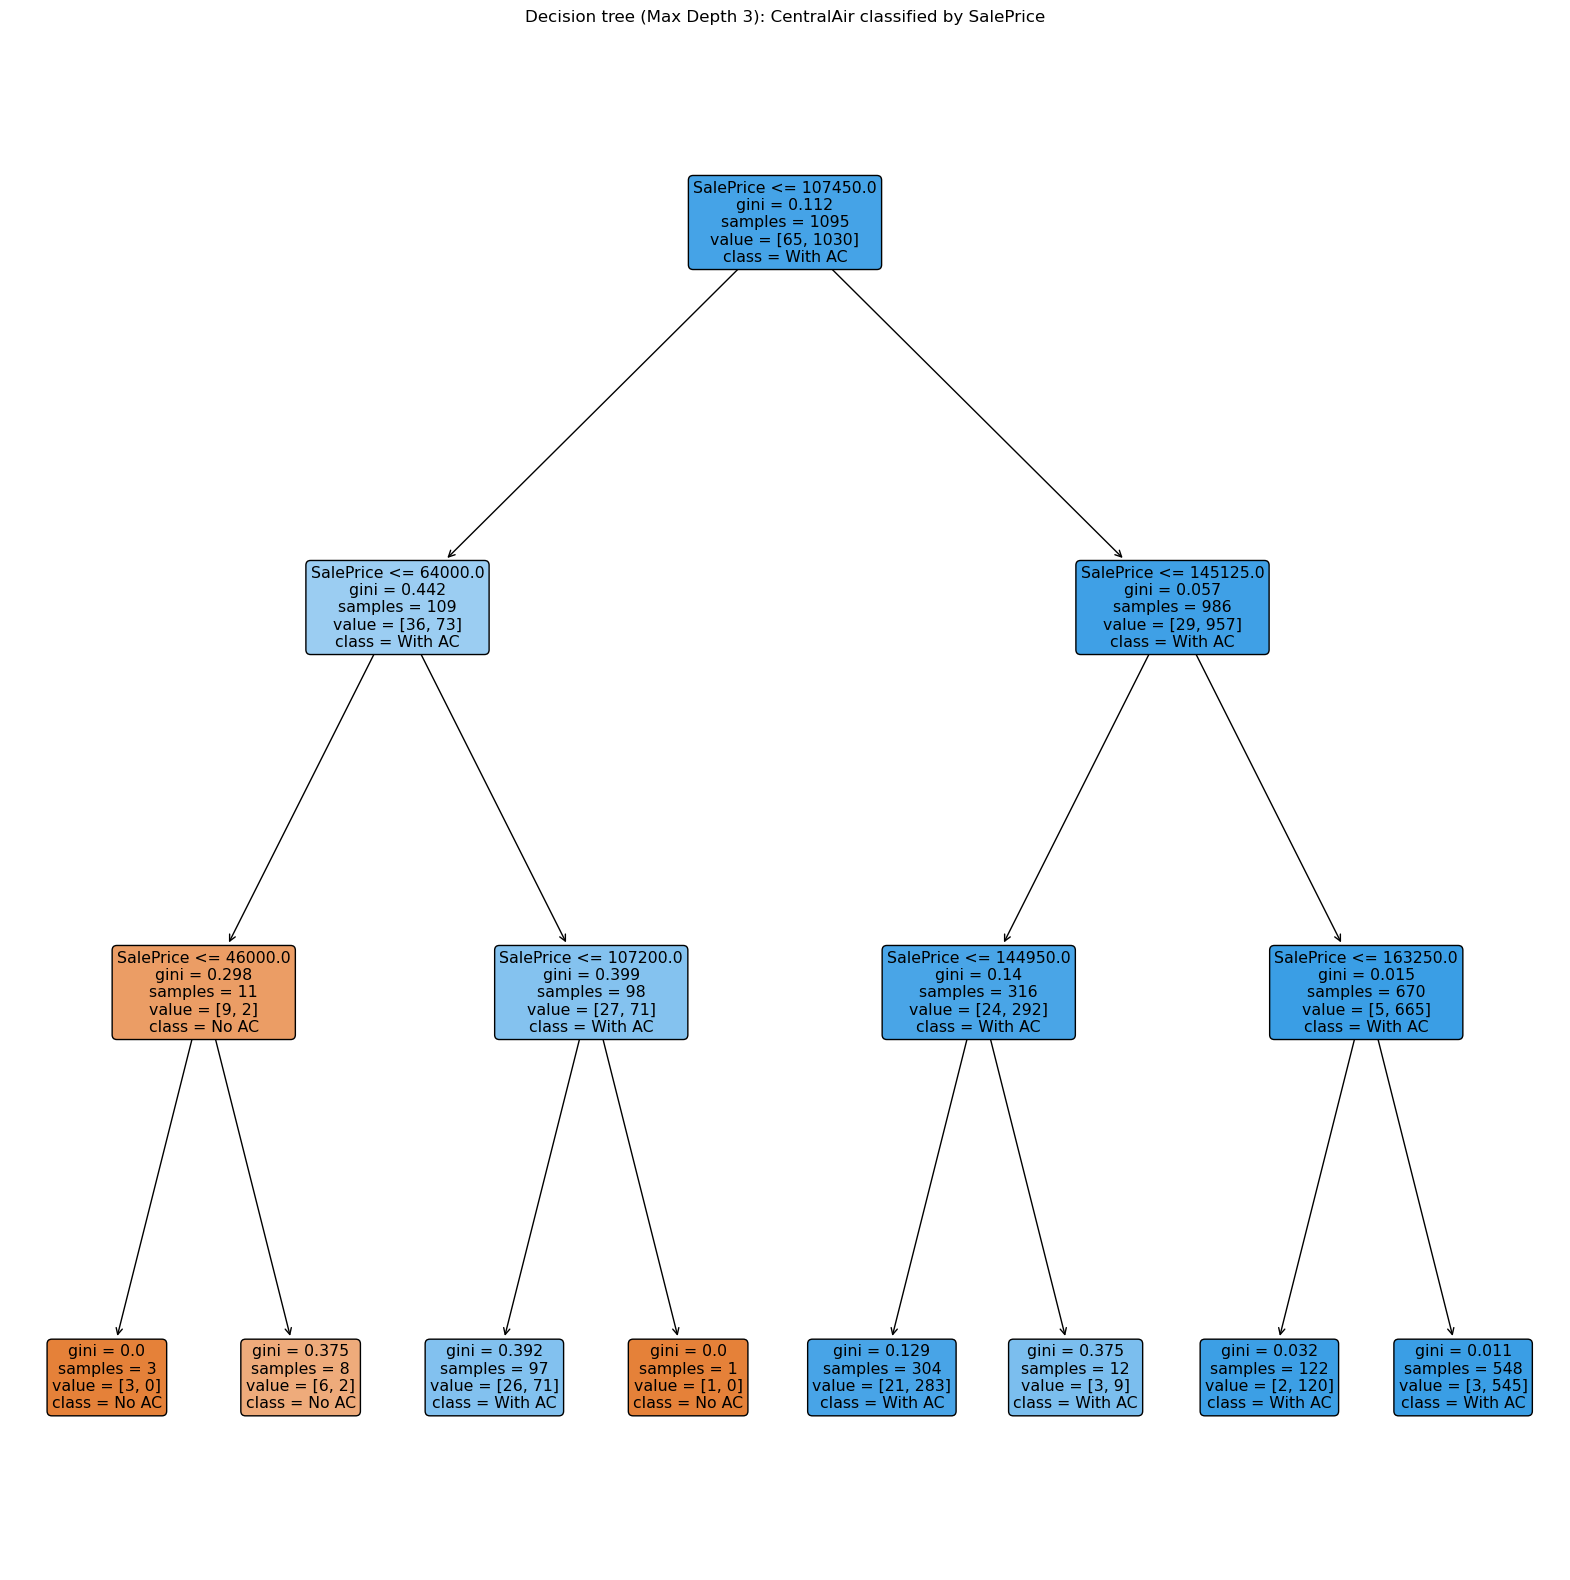

In [14]:
salePrice_3_model.print_dectree()

The leaf node of this tree with the highest number of False Positives is the 3rd from the left

In [15]:
node_mask = (
    (salePrice_3_model.df_train['SalePrice'] > 62250) &
    (salePrice_3_model.df_train['SalePrice'] <= 98150)
)

node_dataframe = salePrice_3_model.df_train.loc[node_mask].copy()
node_dataframe.reset_index(inplace=True)
node_dataframe

,index,SalePrice,CentralAir
0,17,90000,1
1,29,68500,0
2,39,82000,0
3,68,80000,1
4,75,91000,1
...,...,...,...
90,1378,83000,1
91,1412,90000,0
92,1432,64500,1
93,1449,92000,1


All samples within the node has been printed

In [16]:
fp_mask = (
    (salePrice_3_model.df_train['SalePrice'] > 62250) &
    (salePrice_3_model.df_train['SalePrice'] <= 98150) &
    (salePrice_3_model.df_train['CentralAir'] == 0)
)

fp_dataframe = salePrice_3_model.df_train.loc[fp_mask].copy()
fp_dataframe.reset_index(inplace=True)
fp_dataframe

,index,SalePrice,CentralAir
0,29,68500,0
1,39,82000,0
2,88,85000,0
3,98,83000,0
4,125,84500,0
5,155,79000,0
6,210,98000,0
7,242,79000,0
8,264,73000,0
9,325,87000,0


All false positives within the node has been printed 